## Contains Most of the implementations from week1 to week5 for learning(extras and imp can be found in other notebooks like env_and_MAB,env_and_hill_climbing etc)

### week1 and 2 env implementation with diff policies

In [2]:
import pandas as pd
import numpy as np
import gymnasium as gym

In [25]:
env = gym.make('CartPole-v1')
state,info = env.reset()

In [5]:
print(state)
print(env.action_space)
print(env.observation_space)

[-0.00489156 -0.00719826  0.04798775  0.04101536]
Discrete(2)
Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)


In [6]:
steps = 0
total_reward = 0
done = False
truncated = False
while not done and not truncated and steps<50:
    action = env.action_space.sample()
    state,reward,done,truncated,info = env.step(action)
    total_reward+=reward
    steps+=1
    env.render()
env.close()

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\gymnasium\envs\classic_control\cartpole.py:250: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(


In [7]:
print(total_reward)

32.0


In [16]:
steps = 0
rewards = []
done = False
truncated = False
while not done and not truncated and steps<50:
    action = env.action_space.sample()
    state,reward,done,truncated,info = env.step(action)
    rewards.append(reward)
    steps+=1
    env.render()
env.close()

In [17]:
rewards

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [18]:
rewards = [sum(rewards[:i+1]) for i in range(len(rewards))]
print(rewards)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0]


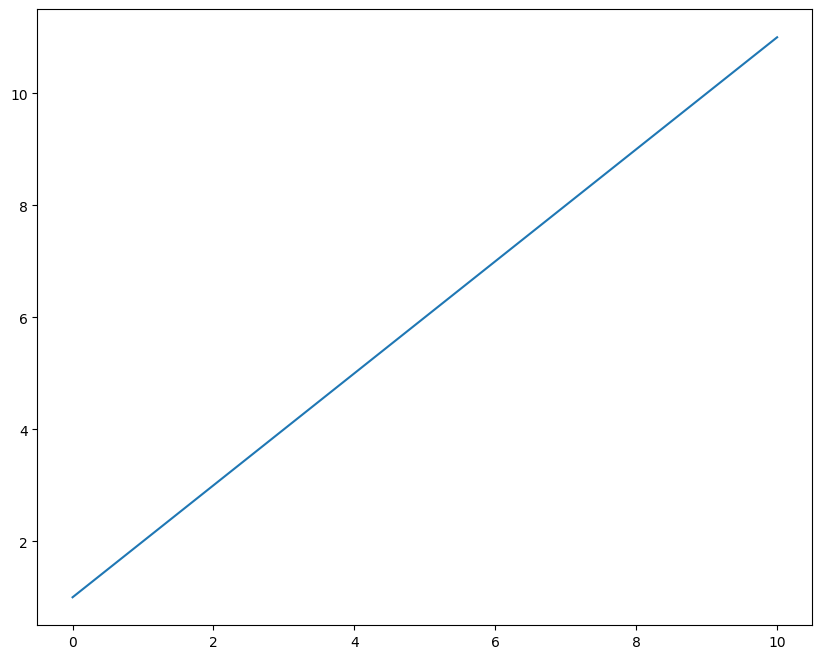

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.plot(range(len(rewards)),rewards)
plt.show()

In [21]:
import time
episodes = 50
episode_reward = []
for i in range(episodes):
    done = False
    truncated = False
    total_reward =0
    state,info = env.reset()
    while not done and not truncated:
        action = env.action_space.sample()
        state,reward,done,truncated,info = env.step(action)
        total_reward+=reward
        env.render()
    episode_reward.append(total_reward)
    time.sleep(1)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\gymnasium\envs\classic_control\cartpole.py:250: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(


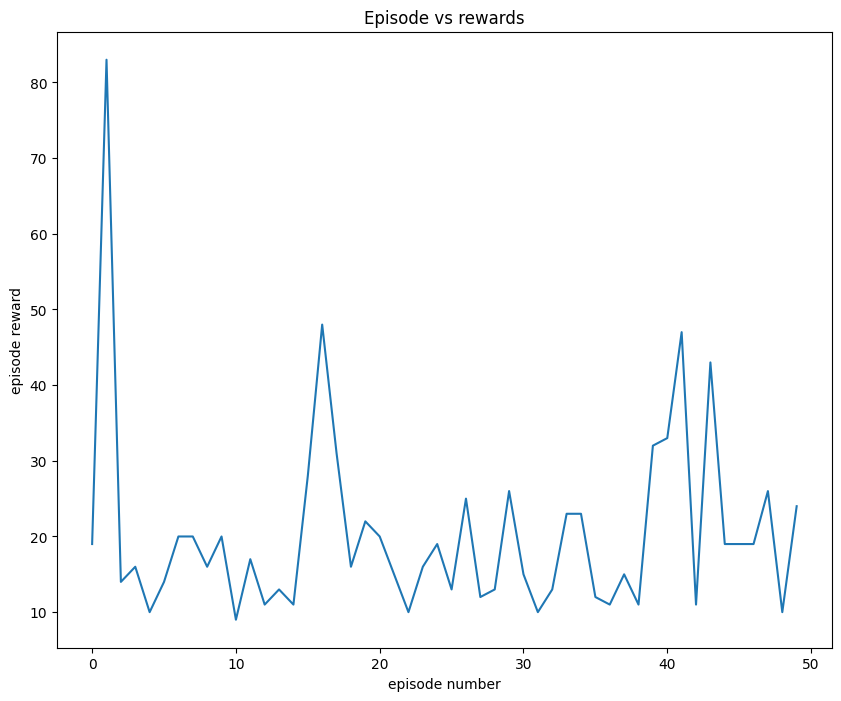

In [24]:
plt.figure(figsize = (10,8))
plt.plot(range(len(episode_reward)),episode_reward)
plt.xlabel("episode number")
plt.ylabel("episode reward")
plt.title("Episode vs rewards")
plt.show()

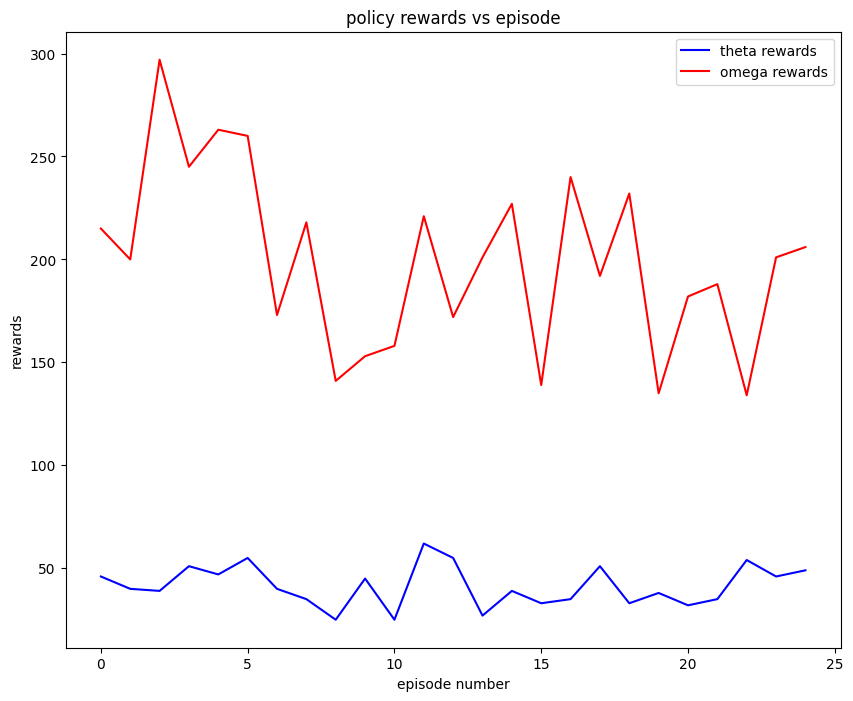

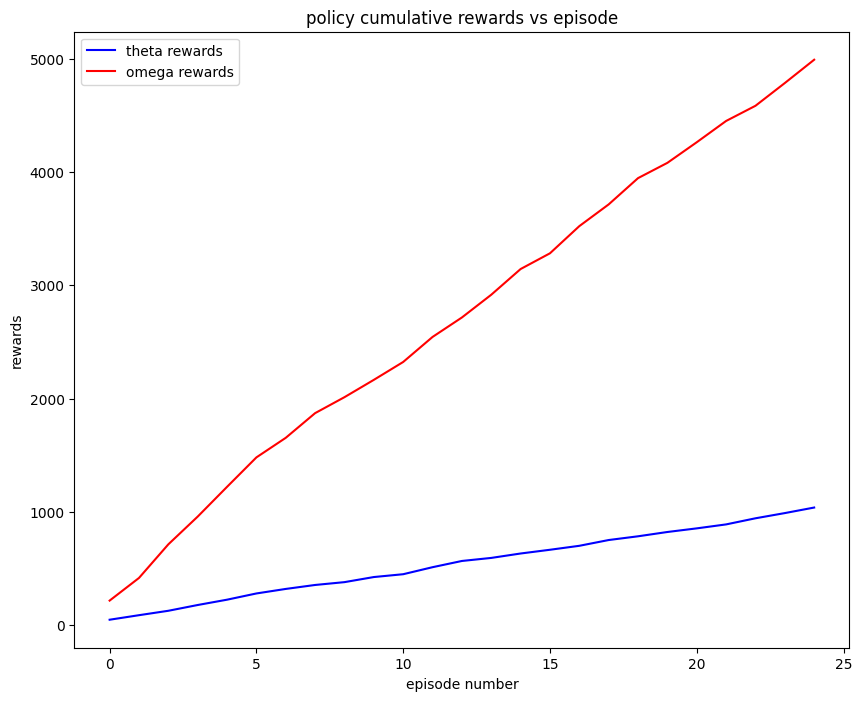

In [26]:
episodes = 25
theta_rewards = []
omega_rewards = []
for i in range(episodes):
    done = False
    truncated = False
    observation,info = env.reset()
    total_reward = 0
    while not done and not truncated:
        theta_value = observation[2]
        action = 0 if theta_value<0 else 1
        observation,reward,done,truncated,info = env.step(action)
        total_reward+=reward
    theta_rewards.append(total_reward)
    time.sleep(1)

for i in range(episodes):
    done = False
    truncated = False
    observation,info = env.reset()
    total_reward = 0
    while not done and not truncated:
        omega_value = observation[3]
        action = 0 if omega_value<0 else 1
        observation,reward,done,truncated,info = env.step(action)
        total_reward+=reward
    omega_rewards.append(total_reward)
    time.sleep(1)


#plotting just rewards
plt.figure(figsize=(10,8))
plt.plot(theta_rewards,color='blue',label ='theta rewards')
plt.plot(omega_rewards,color='red',label ='omega rewards')
plt.title("policy rewards vs episode")
plt.xlabel("episode number")
plt.ylabel("rewards")
plt.legend()
plt.show()


#plotting just cumulative rewards
theta_cum_reward = [sum(theta_rewards[:i+1]) for i in range(len(theta_rewards))]
omega_cum_reward = [sum(omega_rewards[:i+1]) for i in range(len(omega_rewards))]
plt.figure(figsize=(10,8))
plt.plot(theta_cum_reward,color='blue',label ='theta rewards')
plt.plot(omega_cum_reward,color='red',label ='omega rewards')
plt.title("policy cumulative rewards vs episode")
plt.xlabel("episode number")
plt.ylabel("rewards")
plt.legend()
plt.show()


In [27]:
env = gym.make('MountainCar-v0')
state,info = env.reset()

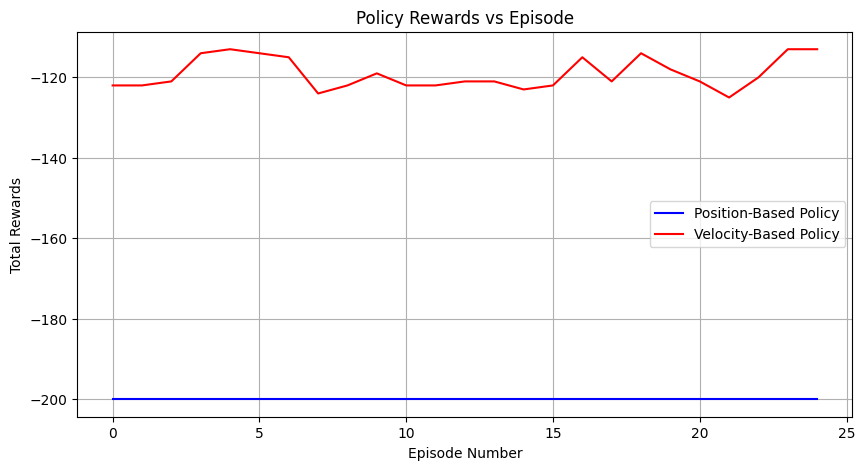

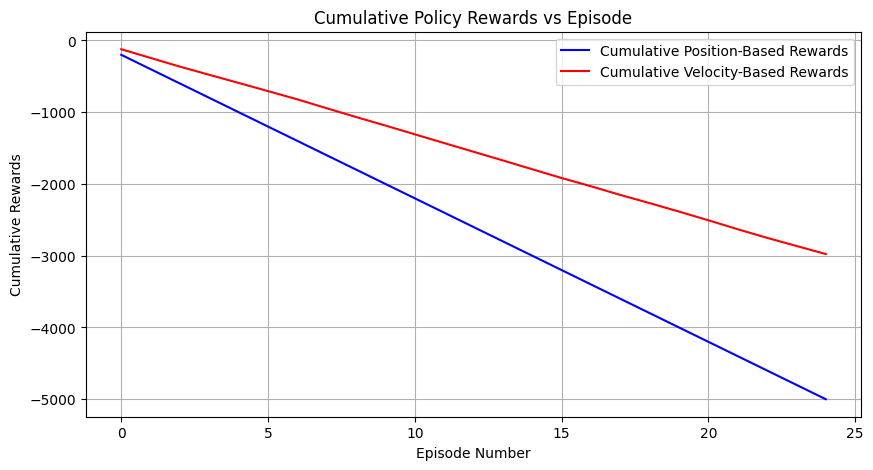

In [30]:
import itertools

# Initialize the environment
env = gym.make("MountainCar-v0", render_mode=None)  # Set to "human" to visualize

# Number of episodes
episodes = 25

# Lists to store rewards
position_rewards = []
velocity_rewards = []

# Run episodes for both policies
for i in range(episodes):
    # Position-based policy
    done = False
    truncated = False
    observation, info = env.reset()
    total_position_reward = 0

    while not done and not truncated:
        position_value = observation[0]  # Extract position
        action = 0 if position_value < 0 else 2  # Move left if on left, right if on right
        observation, reward, done, truncated, info = env.step(action)
        total_position_reward += reward

    position_rewards.append(total_position_reward)

    # Velocity-based policy
    done = False
    truncated = False
    observation, info = env.reset()
    total_velocity_reward = 0

    while not done and not truncated:
        velocity_value = observation[1]  # Extract velocity
        action = 0 if velocity_value < 0 else 2  # Move in the direction of velocity
        observation, reward, done, truncated, info = env.step(action)
        total_velocity_reward += reward

    velocity_rewards.append(total_velocity_reward)

# Close the environment
env.close()

# ---- Plotting: Policy Rewards per Episode ----
plt.figure(figsize=(10, 5))
plt.plot(position_rewards, color='blue', label='Position-Based Policy')
plt.plot(velocity_rewards, color='red', label='Velocity-Based Policy')
plt.title("Policy Rewards vs Episode")
plt.xlabel("Episode Number")
plt.ylabel("Total Rewards")
plt.legend()
plt.grid(True)
plt.show()

# ---- Plotting: Cumulative Rewards ----
position_cum_rewards = list(itertools.accumulate(position_rewards))
velocity_cum_rewards = list(itertools.accumulate(velocity_rewards))

plt.figure(figsize=(10, 5))
plt.plot(position_cum_rewards, color='blue', label='Cumulative Position-Based Rewards')
plt.plot(velocity_cum_rewards, color='red', label='Cumulative Velocity-Based Rewards')
plt.title("Cumulative Policy Rewards vs Episode")
plt.xlabel("Episode Number")
plt.ylabel("Cumulative Rewards")
plt.legend()
plt.grid(True)
plt.show()


### BFS DFS Implementation

In [ ]:
from collections import deque

def breadth_first_search(source, target, graph):
    queue = deque([(source, [source])])  # Start with source node and path
    explored = set()
    explored.add(source)

    while queue:
        node, path = queue.popleft()

        if node == target:
            return path  # Return the full path from source to target

        for neighbour in graph[node]:
            if neighbour not in explored:
                queue.append((neighbour, path + [neighbour]))
                explored.add(neighbour)

    return []  # If no path is found

# Example Graph (Adjacency List)
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

# Example Test
print(breadth_first_search('A', 'F', graph))  
# Output: ['A', 'C', 'F'] (or ['A', 'B', 'E', 'F'], depending on BFS traversal order)


['A', 'C', 'F']


In [32]:
def depth_first_search(source,target,graph):
    stack = [(source,[source])]
    explored= set()
    explored.add(source)
    while stack:
        node,path = stack.pop()
        if node == target:
            return path
        for neighbour in graph[node]:
            if neighbour not in explored:
                stack.append((neighbour,path+[neighbour]))
                explored.add(neighbour)
    return []
# Example Graph (Adjacency List)
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

# Example Test
print(depth_first_search('A', 'F', graph))



['A', 'C', 'F']


## MAB implementation

In [1]:
### MAB implementation on Mountain Car
import gymnasium as gym
import numpy as np
import pandas as pd
env = gym.make('MountainCar-v0')
state,info = env.reset()

In [2]:
np.random.seed(42)#so proper we get
def epislon_greedy(Q_values,epislon):
    if np.random.rand()<epislon: #.rand() gives between 0 and 1 from the random distribution
        return np.random.choice(len(Q_values)) #so gives index of q values random choice
    else:
        return np.argmax(Q_values)#so to get the max value of Qvalues array

In [12]:
# Initialize Q-values and counts
Q_values = np.zeros(3)  # There are 3 possible actions: left, still, right
N_values = np.zeros(3)

steps = 0
done = False
truncated = False
total_reward = 0
epsilon = 0.2

while steps < 100 and not done and not truncated:
    action_index = epislon_greedy(Q_values, epsilon)
    state, reward, done, truncated, _ = env.step(action_index)
    
    # Update count of chosen action
    N_values[action_index] += 1
    
    # Update Q-value using incremental mean formula
    Q_values[action_index] += (reward - Q_values[action_index]) / N_values[action_index]
    
    steps += 1
    total_reward += reward

env.close()
print("Total Reward:", total_reward)
print("Final Q-values:", Q_values)

Total Reward: -100.0
Final Q-values: [-1. -1. -1.]


In [11]:
Q_values

array([-1., -1., -1.])

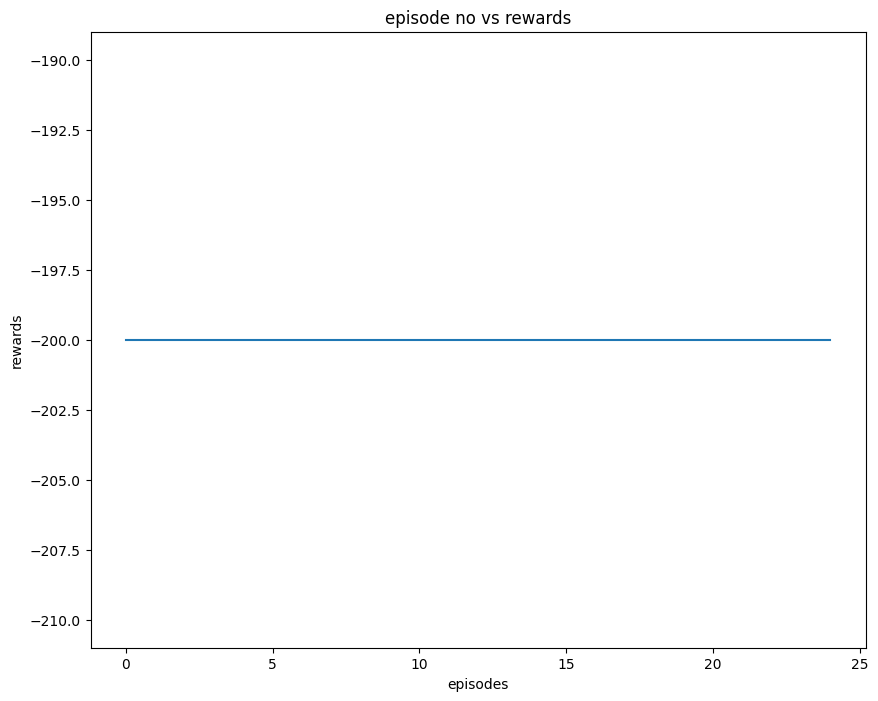

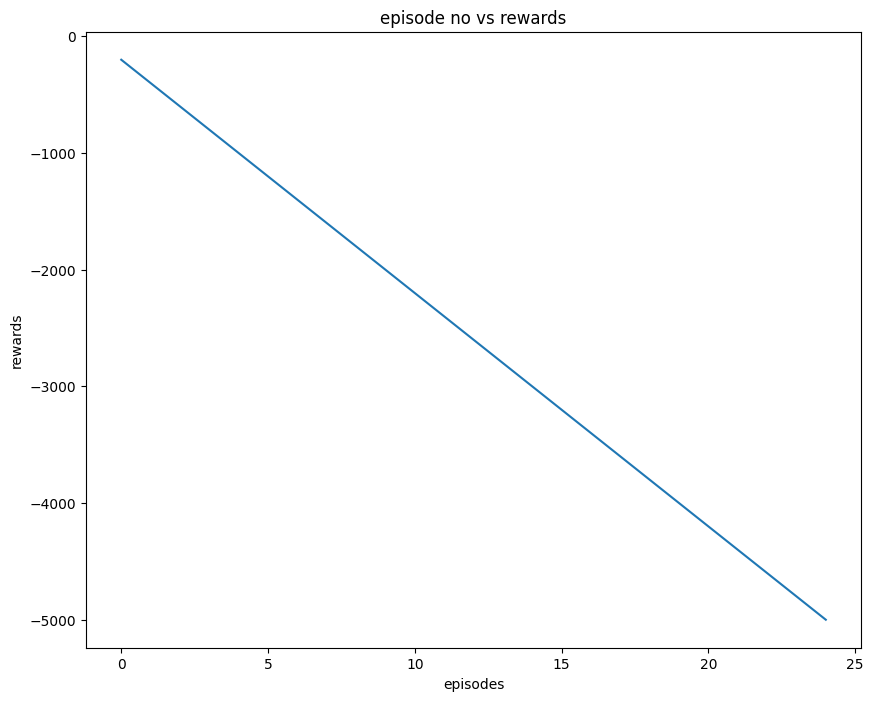

In [ ]:
#implementing MAB for diff episodes on mountain car(like policy for the others)
episodes = 25
episodes_reward = []

for i in range(episodes):
    Q_values = np.zeros(3)
    N_values = np.zeros(3)
    done =False
    truncated = False
    total_reward = 0
    epislon = 0.2
    state,info = env.reset()

    while not done and not truncated:
        action_index = epislon_greedy(Q_values,epislon)
        state, reward, done, truncated, _ = env.step(action_index)

        # Update count of chosen action
        N_values[action_index] += 1

        # Update Q-value using incremental mean formula
        Q_values[action_index] += (reward - Q_values[action_index]) / N_values[action_index]

        total_reward += reward

    episodes_reward.append(total_reward)

env.close()

import matplotlib.pyplot as plt
import itertools
plt.figure(figsize=(10,8))
plt.plot(range(len(episodes_reward)),episodes_reward)
plt.xlabel("episodes")
plt.ylabel("rewards")
plt.title("episode no vs rewards")
plt.show()

episode_reward_cum = list(itertools.accumulate(episodes_reward))
plt.figure(figsize=(10,8))
plt.plot(range(len(episode_reward_cum)),episode_reward_cum)
plt.xlabel("episodes")
plt.ylabel("rewards")
plt.title("episode no vs rewards")
plt.show()

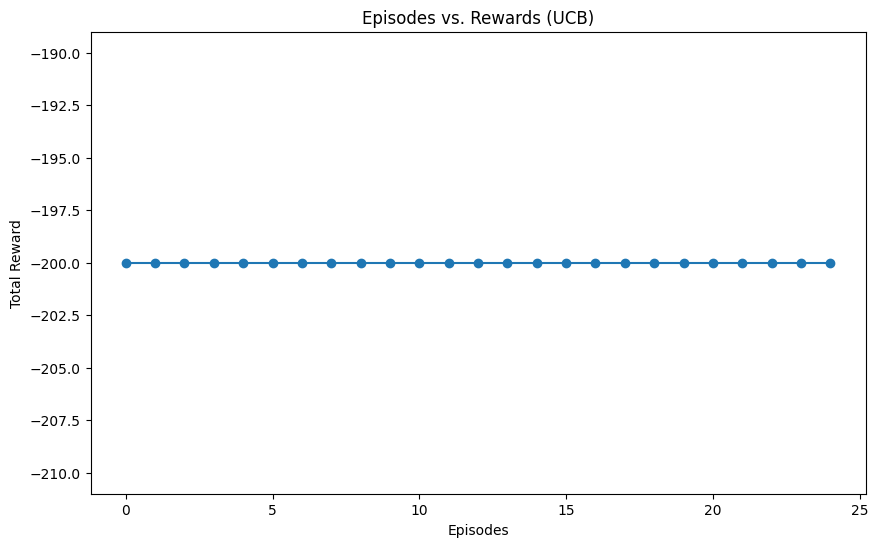

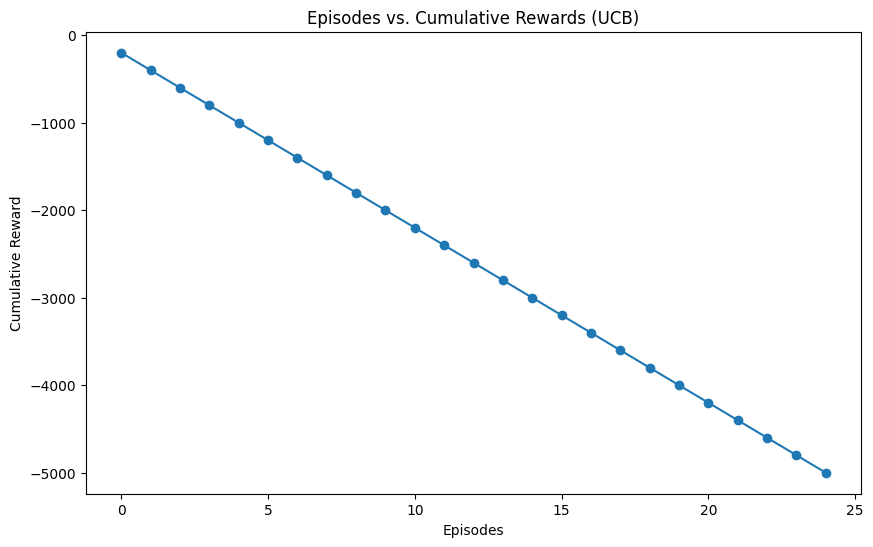

In [18]:
#implementing UCB with mountain car as policy using episodes
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
import itertools

# Define UCB action selection function
def ucb_action_taker(Q_values, N_values, total_steps, c):
    ucb_values = []
    for i in range(len(Q_values)):
        if N_values[i] == 0:
            ucb_values.append(np.inf)  # Assign infinite value for unexplored actions
        else:
            ucb_values.append(Q_values[i] + c * np.sqrt(2 * np.log(total_steps + 1) / N_values[i]))#and formula is this
    return np.argmax(ucb_values)

# Initialize environment
env = gym.make('MountainCar-v0')

episodes = 25
episodes_reward = []

for i in range(episodes):
    Q_values = np.zeros(3)
    N_values = np.zeros(3)
    done = False
    truncated = False
    total_reward = 0
    c = 2.0

    state_info = env.reset()
    state = state_info if isinstance(state_info, np.ndarray) else state_info[0]

    total_steps = 0  # Track total steps taken
    max_steps = 200  # Set a reasonable limit

    while not done and not truncated and total_steps < max_steps:
        action_index = ucb_action_taker(Q_values, N_values, total_steps, c)#total_steps is continuous steps
        state, reward, done, truncated, _ = env.step(action_index)

        # Update count of chosen action
        N_values[action_index] += 1

        # Update Q-value using incremental mean formula
        Q_values[action_index] += (reward - Q_values[action_index]) / N_values[action_index]

        total_reward += reward
        total_steps += 1  # Update step count

    episodes_reward.append(total_reward)

env.close()

# Plot episode rewards
plt.figure(figsize=(10, 6))
plt.plot(range(len(episodes_reward)), episodes_reward, marker='o', linestyle='-')
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Episodes vs. Rewards (UCB)")
plt.show()

# Compute and plot cumulative rewards
episode_reward_cum = list(itertools.accumulate(episodes_reward))
plt.figure(figsize=(10, 6))
plt.plot(range(len(episode_reward_cum)), episode_reward_cum, marker='o', linestyle='-')
plt.xlabel("Episodes")
plt.ylabel("Cumulative Reward")
plt.title("Episodes vs. Cumulative Rewards (UCB)")
plt.show()


### Hill Climbing Implementation

In [ ]:
# For TSP

import tsplib95
import numpy as np

def get_cordinates(problem):
    return {node : problem.node_coords[node] for node in problem.get_nodes()}
    #to return the dict with node and its coordinates
    

problem = tsplib95.load('./Week4/my codes/rd100.tsp')
coordinates = get_cordinates(problem=problem)
coordinates
'''
example output
{1: [143.775, 862.63],
 2: [881.78, 1.18319],
 3: [545.244, 735.005],
 }
'''

{1: [143.775, 862.63],
 2: [881.78, 1.18319],
 3: [545.244, 735.005],
 4: [502.813, 876.001],
 5: [204.876, 345.225],
 6: [701.637, 576.987],
 7: [147.167, 164.286],
 8: [135.382, 807.91],
 9: [628.999, 976.971],
 10: [674.999, 731.447],
 11: [313.696, 299.126],
 12: [445.689, 981.97],
 13: [354.793, 765.215],
 14: [398.129, 976.034],
 15: [273.041, 853.944],
 16: [666.295, 312.27],
 17: [876.942, 925.39],
 18: [134.026, 949.816],
 19: [966.825, 726.799],
 20: [659.346, 889.08],
 21: [400.34, 874.489],
 22: [118.041, 312.04],
 23: [809.87, 50.8555],
 24: [16.2821, 114.161],
 25: [12.6192, 48.2407],
 26: [650.039, 940.261],
 27: [791.189, 758.951],
 28: [907.194, 612.605],
 29: [510.857, 25.8629],
 30: [31.6366, 431.221],
 31: [776.763, 253.781],
 32: [531.819, 906.89],
 33: [654.965, 767.759],
 34: [186.06, 206.527],
 35: [564.595, 2.99685],
 36: [410.816, 437.921],
 37: [930.189, 639.817],
 38: [941.392, 889.979],
 39: [341.538, 39.4141],
 40: [162.622, 95.1969],
 41: [107.558, 262.74

In [4]:
def euclidean_distance(start_cord,end_cord):
    #so we send the node of dict so both will be list of coordinates
    return np.sqrt((start_cord[0] - end_cord[0])**2 + (start_cord[1] - end_cord[1])**2)#so return the euclidean_distance

def calculate_distance_matrix(problem):
    coordinates = get_cordinates(problem=problem)
    #so now we have the dict
    n = len(coordinates)#total number of nodes
    distance_matrix = np.zeros((n,n))#2d array of zeros
    
    for i in range(n):
        for j in range(i+1,n):
            start = list(coordinates.keys())[i]
            end = list(coordinates.keys())[j]
            #getting the nodes (keys gives all the nodes of dict then index)
            distance_matrix[i][j] = euclidean_distance(coordinates[start],coordinates[end])
    
    return distance_matrix

problem = tsplib95.load('./Week4/my codes/rd100.tsp')
distance_matrix = calculate_distance_matrix(problem=problem)

distance_matrix

array([[   0.        , 1134.34650195,  421.26654102, ...,  766.44389621,
         543.59588049,  820.04715234],
       [   0.        ,    0.        ,  807.31092407, ...,  414.90794398,
         643.11343403,  414.45806164],
       [   0.        ,    0.        ,    0.        , ...,  397.46091036,
         164.23692755,  621.7397887 ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
         235.7065088 ,  386.12785427],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,  485.04202491],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

In [10]:
import random
np.random.seed(42)

def get_distance(path,distance_matrix):
    return sum(distance_matrix[path[i],path[i+1]] for i in range(len(path)-1)) + distance_matrix[path[-1],path[0]]

def get_neighbours(path):
    neighbors = []
    for i in range(len(path)):
        for j in range(i+1,len(path)):
            new_path = path[:]
            new_path[i], new_path[j] = new_path[j], new_path[i]
            neighbors.append(new_path)
    
    return neighbors

def simple_hill_climbing(initial_path,distance_matrix):
    current_path = initial_path
    current_distance = get_distance(initial_path,distance_matrix)
    while True:
        neighbours = get_neighbours(current_path)
        next_path = None
        next_distance = current_distance
        for neighbour in neighbours:
            distance = get_distance(neighbour,distance_matrix)
            if distance<next_distance:
                next_distance=distance
                next_path = neighbour
                break
        if next_path == None:
            break

        current_path = next_path
        current_distance = next_distance

    return current_path,current_distance

def stochastic_hill_climbing(initial_path,distance_matrix,max_attempts=100):
    current_path = initial_path
    current_distance = get_distance(current_path,distance_matrix)
    attempts = 0
    
    while attempts<max_attempts:
        neighbours = get_neighbours(current_path)
        next_path = random.choice(neighbours)
        next_distance = get_distance(next_path,distance_matrix)
        
        if current_distance<next_distance:
            current_distance = next_distance
            current_path = next_path
            attempts = 0
        else:
            attempts+=1
    
    return current_path,current_distance

def steepest_hill_climbing(initial_path,distance_matrix):
    current_path = initial_path
    current_distance = get_distance(current_path,distance_matrix)
    
    while True:
        neighbours = get_neighbours(current_path)
        next_path = None
        next_distance = current_distance
        for neighbour in neighbours:
            distance = get_distance(neighbour,distance_matrix)
            if distance<next_distance:
                next_path = neighbour
                next_distance = distance
            
        if next_path == None:
            break #saying no improvement got so
        current_path = next_path
        current_distance = next_distance
    
    return current_path,current_distance

def simulated_annealing(initial_path,distance_matrix,initial_temp = 1000,cooling_rate = 0.995,min_temp = 1):
    current_path = initial_path
    current_distance = get_distance(initial_path,distance_matrix)
    temperature = initial_temp
    
    while temperature > min_temp:
        neighbours = get_neighbours(current_path)
        next_path = random.choice(neighbours)
        next_distance = get_distance(next_path,distance_matrix)
        
        delta_E = next_distance - current_distance
        
        if delta_E<0 or np.random.rand() < np.exp(-delta_E/temperature):
            current_path = next_path
            current_distance = next_distance

        temperature *= cooling_rate
    
    return current_path,current_distance


def run_hill_climbing(distance_matrix):
    num_cities = len(distance_matrix)
    initial_path = list(range(num_cities))
    np.random.shuffle(initial_path)
    
    print(f"Initial Random Path: {initial_path}")

    # Simple Hill Climbing
    best_path, best_distance = simple_hill_climbing(initial_path, distance_matrix)
    print(f"Simple Hill Climbing: Best Path: {best_path}, Distance: {best_distance}")

    # Stochastic Hill Climbing
    best_path, best_distance = stochastic_hill_climbing(initial_path, distance_matrix)
    print(f"Stochastic Hill Climbing: Best Path: {best_path}, Distance: {best_distance}")

    # Steepest Ascent Hill Climbing
    best_path, best_distance = steepest_hill_climbing(initial_path, distance_matrix)
    print(f"Steepest Ascent Hill Climbing: Best Path: {best_path}, Distance: {best_distance}")

    # Simulated Annealing
    best_path, best_distance = simulated_annealing(initial_path, distance_matrix)
    print(f"Simulated Annealing: Best Path: {best_path}, Distance: {best_distance}")

# Run the hill-climbing algorithms
run_hill_climbing(distance_matrix)

Initial Random Path: [83, 53, 70, 45, 44, 39, 22, 80, 10, 0, 18, 30, 73, 33, 90, 4, 76, 77, 12, 31, 55, 88, 26, 42, 69, 15, 40, 96, 9, 72, 11, 47, 85, 28, 93, 5, 66, 65, 35, 16, 49, 34, 7, 95, 27, 19, 81, 25, 62, 13, 24, 3, 17, 38, 8, 78, 6, 64, 36, 89, 56, 99, 54, 43, 50, 67, 46, 68, 61, 97, 79, 41, 58, 48, 98, 57, 75, 32, 94, 59, 63, 84, 37, 29, 1, 52, 21, 2, 23, 87, 91, 74, 86, 82, 20, 60, 71, 14, 92, 51]
Simple Hill Climbing: Best Path: [45, 32, 27, 92, 76, 44, 18, 72, 67, 63, 56, 25, 12, 7, 89, 83, 46, 41, 33, 31, 1, 88, 15, 97, 90, 42, 14, 96, 57, 49, 40, 20, 85, 5, 93, 91, 66, 65, 35, 26, 55, 34, 28, 95, 36, 13, 81, 74, 62, 39, 38, 30, 10, 9, 2, 77, 69, 64, 50, 47, 43, 99, 54, 6, 4, 80, 70, 0, 59, 29, 79, 68, 58, 52, 98, 94, 87, 75, 53, 17, 11, 84, 37, 21, 8, 3, 48, 24, 22, 16, 71, 61, 86, 82, 78, 60, 23, 19, 73, 51], Distance: 1968.2131431203538
Stochastic Hill Climbing: Best Path: [50, 53, 70, 74, 99, 32, 60, 71, 95, 0, 18, 33, 83, 84, 90, 21, 66, 76, 85, 63, 94, 10, 16, 42, 9

In [15]:
random.seed(42)

In [17]:
## Implementation for Job Scheduling

#go through all machines and make sum of the jobs assigned to it as the makespan, then return the maximum of it(this will be our fitness function)
def calculate_makespan(schedule,num_machines):
    workloads = [0] * num_machines
    for machine,jobs in enumerate(schedule):
        workloads[machine]=sum(jobs)
    return max(workloads)

def generate_inital_schedule(jobs,num_machines):
    schedule = [[] for i in range(num_machines)]#make a 2d array
    for job in jobs:
        random.choice(schedule).append(job)
    return schedule
def generate_neighbours(schedule):
    neighbours = []
    for i in range(len(schedule)):
        #go through each machine
        for j in range(len(schedule[i])):
            #go through each job of machine[i]
            for k in range(len(schedule)):
                #now again through all the machines
                if i!=k:
                    new_schedule = [list(machine) for machine in schedule]#make a dummy schedule
                    #not the same machine from which job was taken then
                    job = new_schedule[i].pop(j)#pop j job of ith machine from the ith machine
                    new_schedule[k].append(job) #now add that job to the kth machine in schedule
                    
                    #now append to the neighbours
                    neighbours.append(new_schedule)
    return neighbours

def simple_hill_climbing(jobs,num_machines):
    current_schedule = generate_inital_schedule(jobs,num_machines)
    current_makespan = calculate_makespan(current_schedule,num_machines)
    
    while True:
        neighbours = generate_neighbours(current_schedule)
        next_schedule = None
        next_makespan = current_makespan
        for neighbour in neighbours:
            makespan = calculate_makespan(neighbour,num_machines)
            if makespan < next_makespan:
                next_makespan = makespan
                next_schedule = neighbour
                break
        if next_schedule == None:
            break
        
        current_schedule = next_schedule
        current_makespan = next_makespan
    
    return current_schedule,current_makespan

def stochastic_hill_climbing(jobs,num_machines,max_attempts=100):
    current_schedule = generate_inital_schedule(jobs,num_machines)
    current_makespan = calculate_makespan(current_schedule,num_machines)
    attempt = 0
    while attempt < max_attempts:
        neighbours = generate_neighbours(current_schedule)
        neighbour  = random.choice(neighbours)
        next_makespan = calculate_makespan(neighbour,num_machines)
        
        if next_makespan < current_makespan:
            current_makespan = next_makespan
            current_schedule = neighbour
            attempt = 0
        else:
            attempt+=1
    
    return current_schedule,current_makespan

def steepest_hill_climbing(jobs,num_machines):
    current_schedule = generate_inital_schedule(jobs,num_machines)
    current_makespan = calculate_makespan(current_schedule,num_machines)
    
    while True:
        neighbours = generate_neighbours(current_schedule)
        next_schedule = None
        next_makespan = current_makespan
        for neighbour in neighbours:
            makespan = calculate_makespan(neighbour,num_machines)
            if makespan < next_makespan:
                next_makespan = makespan
                next_schedule = neighbour

        if next_schedule == None:
            break
        
        current_schedule = next_schedule
        current_makespan = next_makespan
    
    return current_schedule,current_makespan

import time
# Function to run all algorithms and compare performance
def run_job_scheduling(jobs, num_machines):
    print(f"Jobs: {jobs}")
    print(f"Number of machines: {num_machines}\n")

    start = time.time()
    best_schedule, best_makespan = simple_hill_climbing(jobs, num_machines)
    print(f"Simple Hill Climbing: Makespan = {best_makespan}, Time = {time.time() - start:.4f} sec")

    start = time.time()
    best_schedule, best_makespan = stochastic_hill_climbing(jobs, num_machines)
    print(f"Stochastic Hill Climbing: Makespan = {best_makespan}, Time = {time.time() - start:.4f} sec")

    start = time.time()
    best_schedule, best_makespan = steepest_hill_climbing(jobs, num_machines)
    print(f"Steepest Ascent Hill Climbing: Makespan = {best_makespan}, Time = {time.time() - start:.4f} sec")

# Example Run
jobs = [random.randint(1, 100) for _ in range(10)]  # Random job times
num_machines = 3  # Number of machines
run_job_scheduling(jobs, num_machines)
#basically jobs ka time will be given and num of machine and assign to machines such that there is less workload on each machine

Jobs: [1, 93, 93, 34, 65, 98, 23, 65, 14, 81]
Number of machines: 3

Simple Hill Climbing: Makespan = 197, Time = 0.0005 sec
Stochastic Hill Climbing: Makespan = 194, Time = 0.0020 sec
Steepest Ascent Hill Climbing: Makespan = 197, Time = 0.0000 sec


In [ ]:
#implementing for the N-Queens
def attack_calculate(board):
    n = len(board)
    attacks = 0
    for i in range(n):
        for j in range(n):
            if board[i] == board[j] or abs(board[i]-board[j]) == abs(i-j):
                attacks+=1
    return attacks

def generate_neighbours(board):
    neighbours = []
    n = len(board)
    for col in range(n):
        #go for each col and explore in it for each row
        for row in range(n):
            if board[col]!=row:
                #so skip the same row placement
                new_board = board[:]
                new_board[col] = row
                neighbours.append(new_board)
    return neighbours

def simple_hill_climbing(board):
    current_board = board
    current_attack = attack_calculate(board)
    while True:
        next_board = None
        next_attack = current_attack
        neighbours = generate_neighbours(board)
        for neighbour in neighbours:
            attack = attack_calculate(neighbour)
            if attack < next_attack:
                next_attack = attack
                next_board = neighbour
                break
        if next_board == None:
            break
        current_board = next_board
        current_attack = next_attack
    return current_board,current_attack

def  stochastic_hill_climbing(board,max_attempts=100):
    current_board =board
    current_attack = attack_calculate(current_board)
    attempts =0
    
    while attempts < max_attempts:
        neighbours = generate_neighbours(board)
        next_board = random.choice(neighbours)
        next_attack = attack_calculate(next_board)
        if next_attack < current_attack:
            current_attack = next_attack
            current_board = next_board
            attempts = 0
        else:
            attempts+=1
    
    return current_board,current_attack

def steepest_hill_climbing(board):
    current_board = board
    current_attack = attack_calculate(board)
    while True:
        next_board = None
        next_attack = current_attack
        neighbours = generate_neighbours(board)
        for neighbour in neighbours:
            attack = attack_calculate(neighbour)
            if attack < next_attack:
                next_attack = attack
                next_board = neighbour

        if next_board == None:
            break
        current_board = next_board
        current_attack = next_attack
    return current_board,current_attack

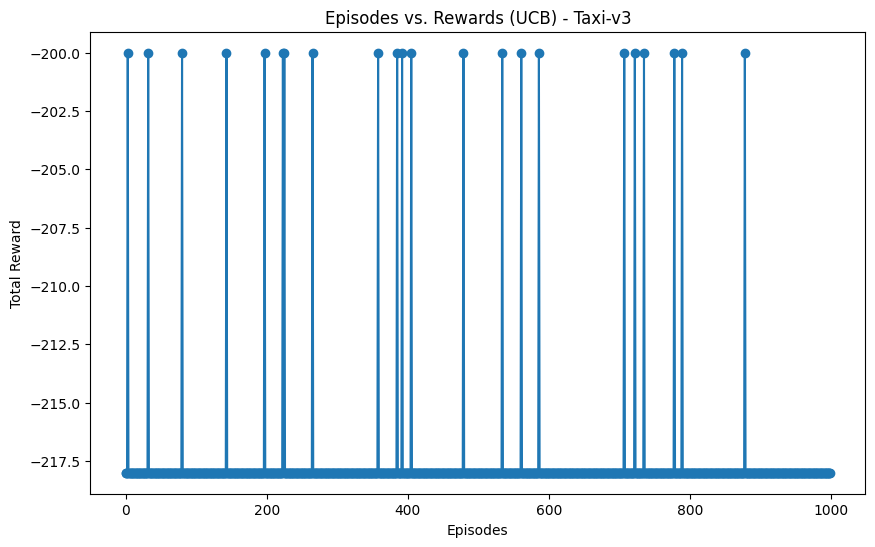

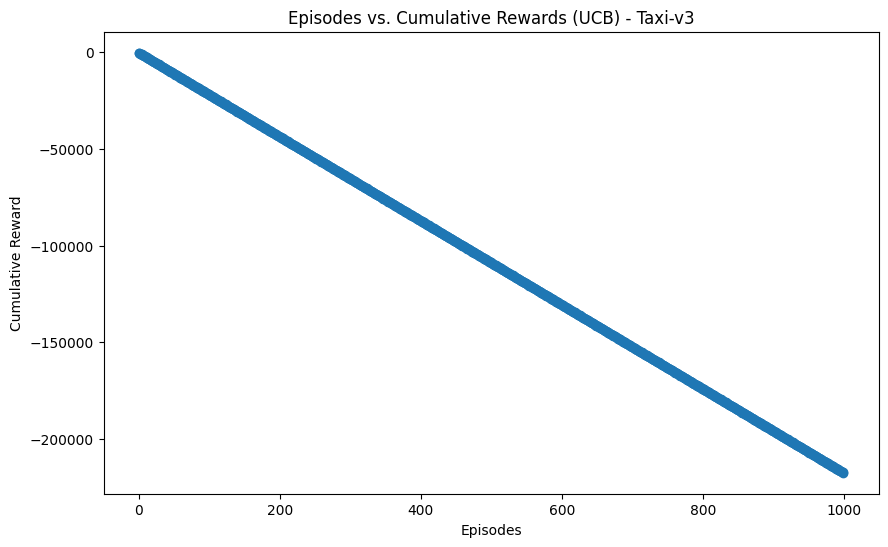

In [18]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
import itertools

def ucb_action_taker(Q_values, N_values, total_steps, c):
    ucb_values = []
    for i in range(len(Q_values)):
        if N_values[i] == 0:
            ucb_values.append(np.inf)  # Assign infinite value for unexplored actions
        else:
            ucb_values.append(Q_values[i] + c * np.sqrt(2 * np.log(total_steps + 1) / N_values[i]))
    return np.argmax(ucb_values)

# Initialize environment
env = gym.make("Taxi-v3")

episodes = 1000
episodes_reward = []

for i in range(episodes):
    Q_values = np.zeros(env.action_space.n)
    N_values = np.zeros(env.action_space.n)
    done = False
    total_reward = 0
    c = 2.0

    state_info = env.reset()
    state = state_info if isinstance(state_info, np.ndarray) else state_info[0]

    total_steps = 0  # Track total steps taken
    max_steps = 200  # Set a reasonable limit

    while not done and total_steps < max_steps:
        action_index = ucb_action_taker(Q_values, N_values, total_steps, c)
        state, reward, done, truncated, _ = env.step(action_index)

        # Update count of chosen action
        N_values[action_index] += 1

        # Update Q-value using incremental mean formula
        Q_values[action_index] += (reward - Q_values[action_index]) / N_values[action_index]

        total_reward += reward
        total_steps += 1

    episodes_reward.append(total_reward)

env.close()

# Plot episode rewards
plt.figure(figsize=(10, 6))
plt.plot(range(len(episodes_reward)), episodes_reward, marker='o', linestyle='-')
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Episodes vs. Rewards (UCB) - Taxi-v3")
plt.show()

# Compute and plot cumulative rewards
episode_reward_cum = list(itertools.accumulate(episodes_reward))
plt.figure(figsize=(10, 6))
plt.plot(range(len(episode_reward_cum)), episode_reward_cum, marker='o', linestyle='-')
plt.xlabel("Episodes")
plt.ylabel("Cumulative Reward")
plt.title("Episodes vs. Cumulative Rewards (UCB) - Taxi-v3")
plt.show()


## Implementing Depth Limited Search

In [1]:
def Depth_Limited_Search(node,target,graph,limit,path = None):
    if path == None:
        path = []
    path.append(node)
    
    if node == target:
        return True,path
    
    if limit <=0:
        path.pop()
        return False,None
    
    for neighbor in graph[node]:
        if neighbor not in path:
            found,result_path = Depth_Limited_Search(neighbor,target,graph,limit-1,path)
            if found:
                return found,result_path
    
    path.pop()
    return False,None

def Iterative_Deepening_DLS(start,target,graph):
    depth = 1 #start with depth as 1
    while True:
        found,path = Depth_Limited_Search(start,target,graph,depth)
        if found:
            return path
        depth+=1

# Example graph represented as an adjacency list
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

start_node = 'A'
goal_node = 'F'

result_path = Iterative_Deepening_DLS(start_node, goal_node, graph)
print("Path to goal:", result_path)

Path to goal: ['A', 'C', 'F']


In [2]:
#recursive DFS (same as above just no depth call once and if found return True)
def DFS_recursive(graph, node, target, visited=None, path=None):
    if visited is None:
        visited = set()
    if path is None:
        path = []
    
    # Mark node as visited and add to path
    visited.add(node)
    path.append(node)

    # Check if the target is found
    if node == target:
        return True, path

    # Recur for all unvisited neighbors
    for neighbor in graph[node]:
        if neighbor not in visited:
            found, result_path = DFS_recursive(graph, neighbor, target, visited, path)
            if found:
                return found, result_path

    # Backtrack if target not found in this path
    path.pop()
    return False, None

# Example graph (Adjacency List)
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

start_node = 'A'
goal_node = 'F'

found, result_path = DFS_recursive(graph, start_node, goal_node)
if found:
    print("Path to goal:", result_path)
else:
    print("Goal not found")


Path to goal: ['A', 'B', 'E', 'F']
